In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chocolate-sales/Chocolate Sales.csv


<ipython-input-2-4670eb802e5b>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


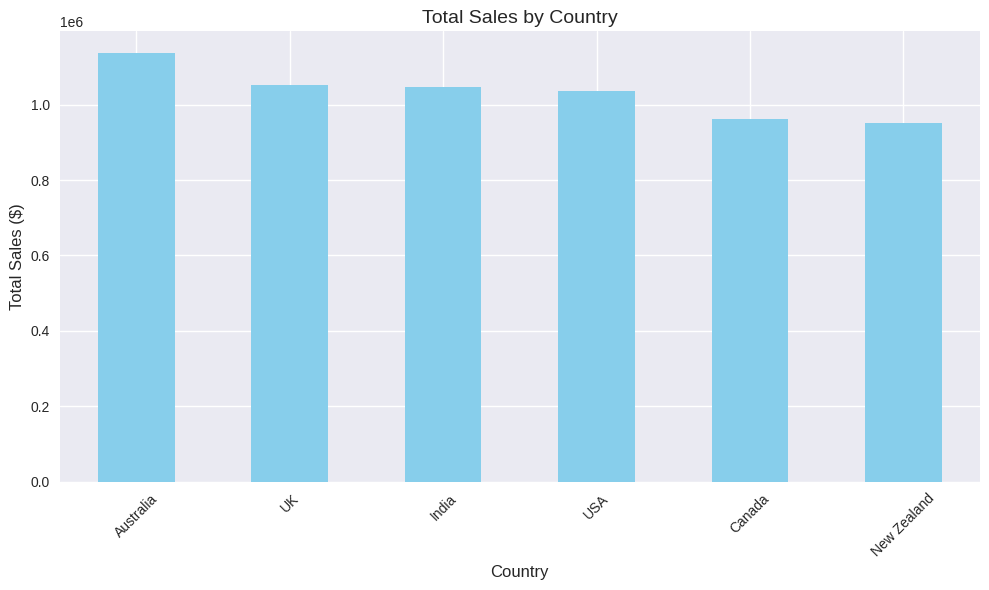

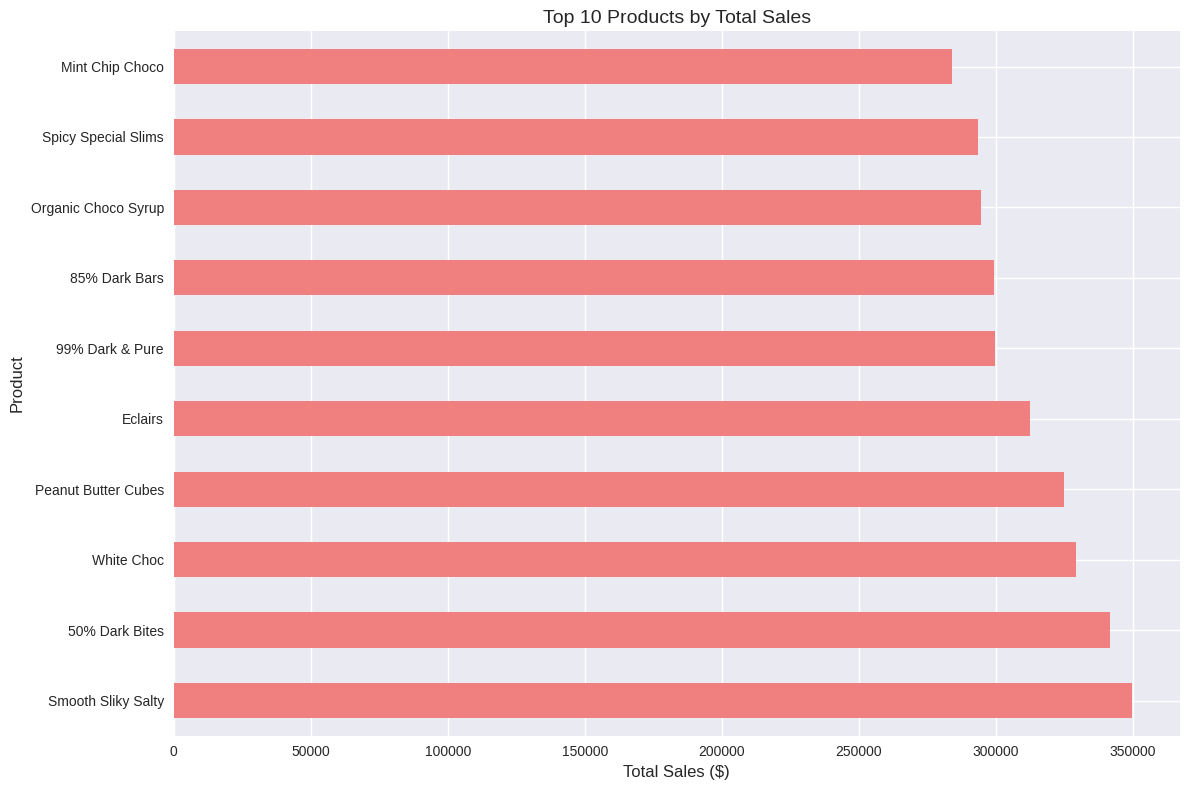

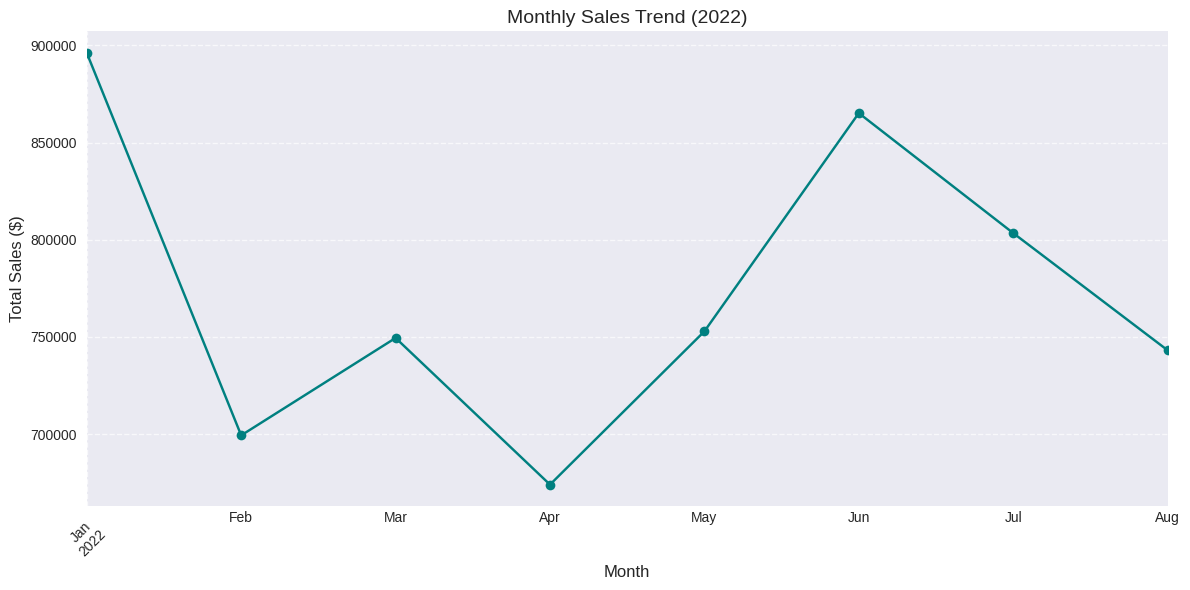

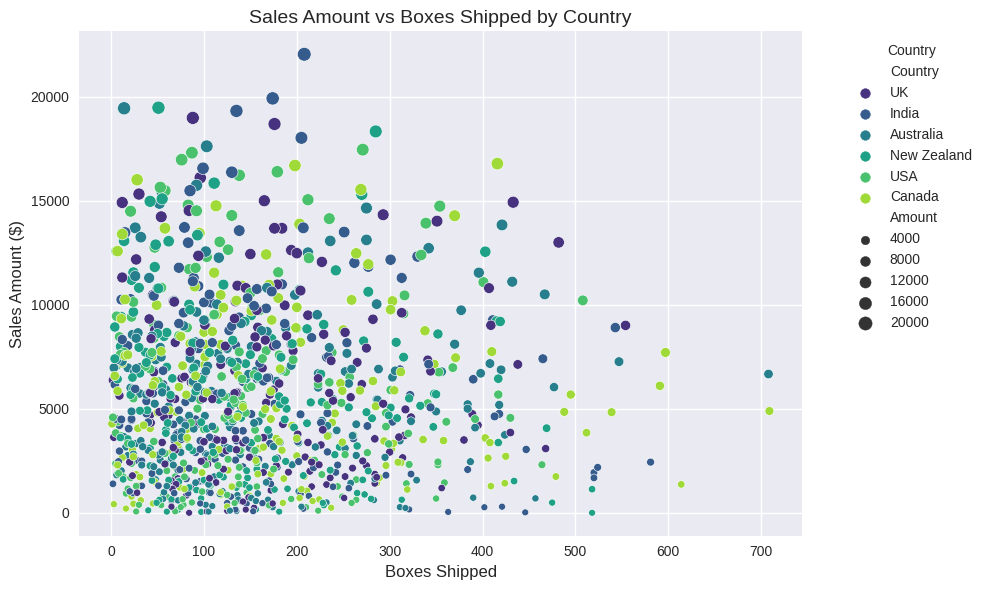

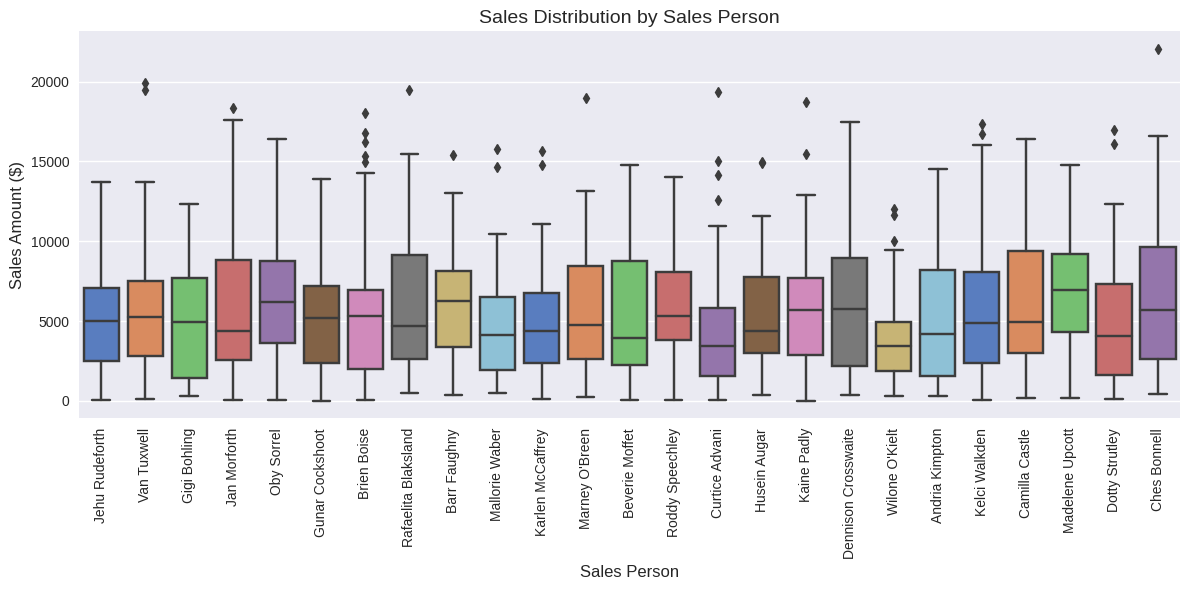

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Kaggle file path
file_path = '/kaggle/input/chocolate-sales/Chocolate Sales.csv'
df = pd.read_csv(file_path)

# Clean the 'Amount' column (remove '$' and commas, convert to float)
df['Amount'] = df['Amount'].replace({'\$': '', ',': '', ' ': ''}, regex=True).astype(float)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Set up plotting style
plt.style.use('seaborn')

# Visualization 1: Total Sales by Country (Bar Plot)
plt.figure(figsize=(10, 6))
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
country_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Top 10 Products by Sales (Horizontal Bar Plot)
plt.figure(figsize=(12, 8))
top_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', color='lightcoral')
plt.title('Top 10 Products by Total Sales', fontsize=14)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.tight_layout()
plt.show()

# Visualization 3: Sales Trend Over Time (Monthly Line Plot)
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Sales Trend (2022)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 4: Sales vs Boxes Shipped by Country (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Boxes Shipped', y='Amount', hue='Country', size='Amount', palette='viridis')
plt.title('Sales Amount vs Boxes Shipped by Country', fontsize=14)
plt.xlabel('Boxes Shipped', fontsize=12)
plt.ylabel('Sales Amount ($)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization 5: Sales Distribution by Sales Person (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sales Person', y='Amount', data=df, palette='muted')
plt.title('Sales Distribution by Sales Person', fontsize=14)
plt.xlabel('Sales Person', fontsize=12)
plt.ylabel('Sales Amount ($)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

14:01:33 - cmdstanpy - INFO - Chain [1] start processing
14:01:33 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

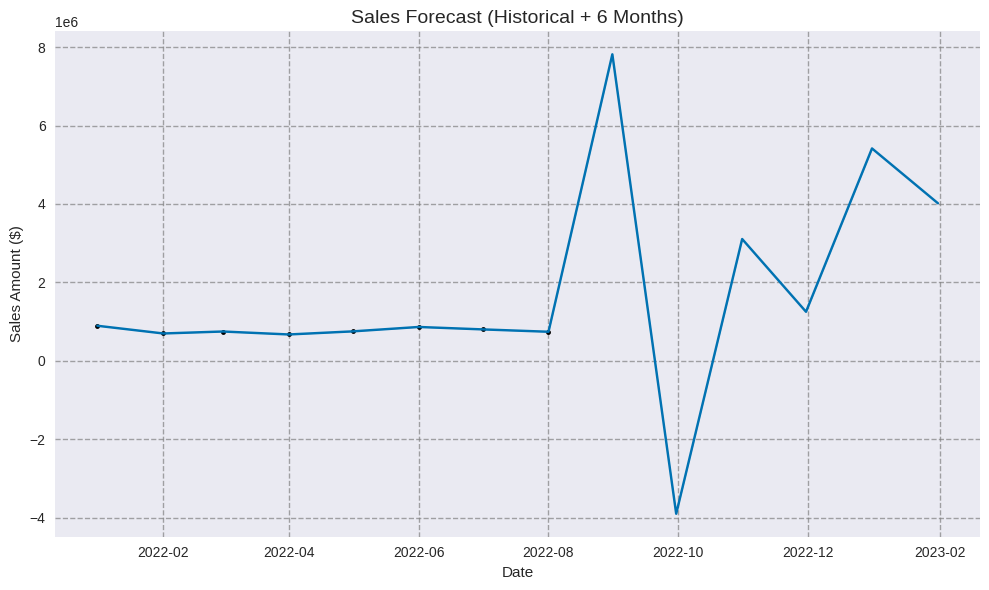

<Figure size 1200x800 with 0 Axes>

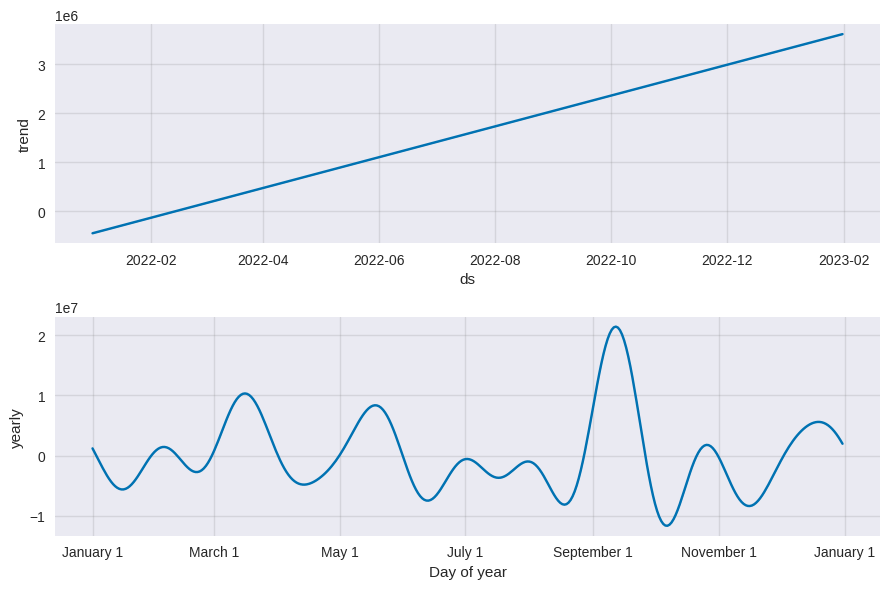

           ds          yhat    yhat_lower    yhat_upper
4  2022-05-01  7.528803e+05  7.528803e+05  7.528803e+05
5  2022-06-01  8.651329e+05  8.651329e+05  8.651329e+05
6  2022-07-01  8.034295e+05  8.034295e+05  8.034295e+05
7  2022-08-01  7.431505e+05  7.431505e+05  7.431505e+05
8  2022-08-31  7.815372e+06  7.815372e+06  7.815372e+06
9  2022-09-30 -3.895917e+06 -3.895917e+06 -3.895917e+06
10 2022-10-31  3.106975e+06  3.106975e+06  3.106975e+06
11 2022-11-30  1.252653e+06  1.252653e+06  1.252653e+06
12 2022-12-31  5.415872e+06  5.415872e+06  5.415872e+06
13 2023-01-31  4.017752e+06  4.017752e+06  4.017752e+06


In [6]:
# Install prophet (run this in a separate cell if needed)
!pip install prophet

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet  # Updated import

# Load the data from the Kaggle file path
file_path = '/kaggle/input/chocolate-sales/Chocolate Sales.csv'
df = pd.read_csv(file_path)

# Clean the 'Amount' column (remove '$' and commas, convert to float)
df['Amount'] = df['Amount'].replace({'\$': '', ',': '', ' ': ''}, regex=True).astype(float)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Aggregate sales by month
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()  # Convert period to timestamp

# Prepare data for Prophet (requires 'ds' for date and 'y' for value)
prophet_df = monthly_sales.rename(columns={'Date': 'ds', 'Amount': 'y'})

# Initialize and fit the Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(prophet_df)

# Create future dates for forecasting (6 months into the future)
future_dates = model.make_future_dataframe(periods=6, freq='M')

# Generate forecast
forecast = model.predict(future_dates)

# Plot the forecast
plt.figure(figsize=(12, 6))
model.plot(forecast, xlabel='Date', ylabel='Sales Amount ($)')
plt.title('Sales Forecast (Historical + 6 Months)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot forecast components (trend, seasonality)
plt.figure(figsize=(12, 8))
model.plot_components(forecast)
plt.tight_layout()
plt.show()

# Display the forecast data
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

<ipython-input-7-09263987fb08>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


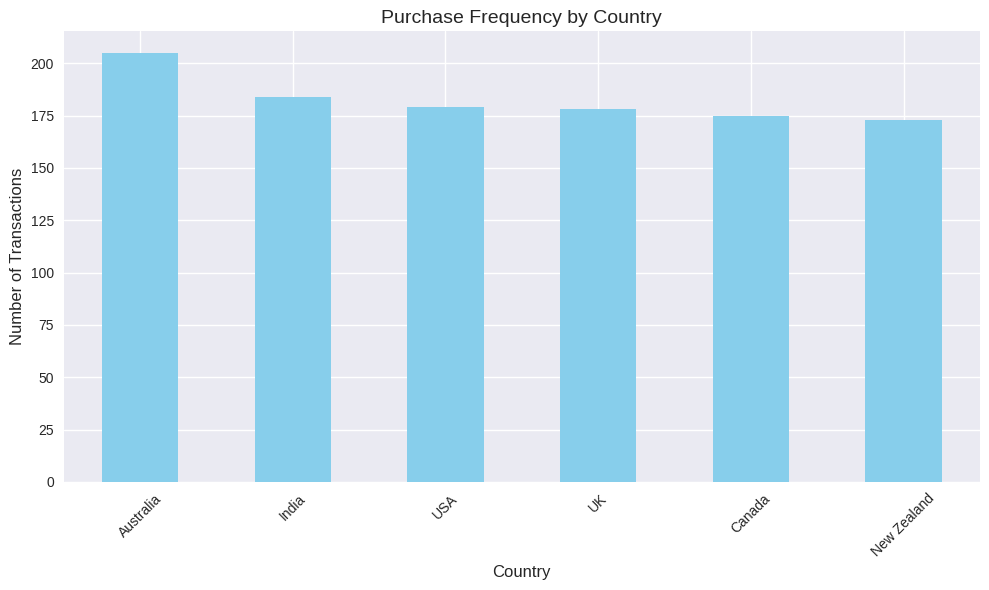

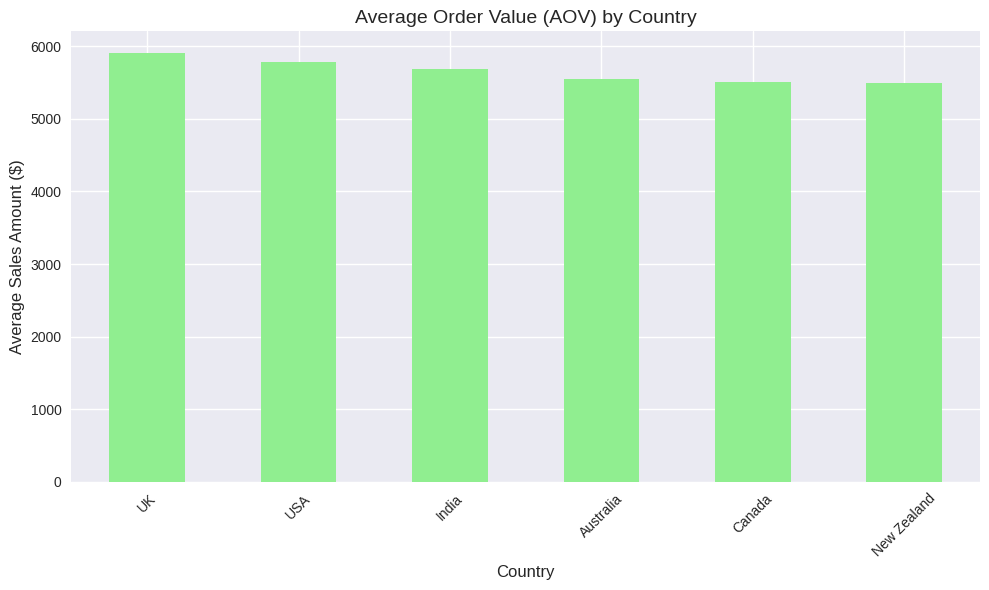

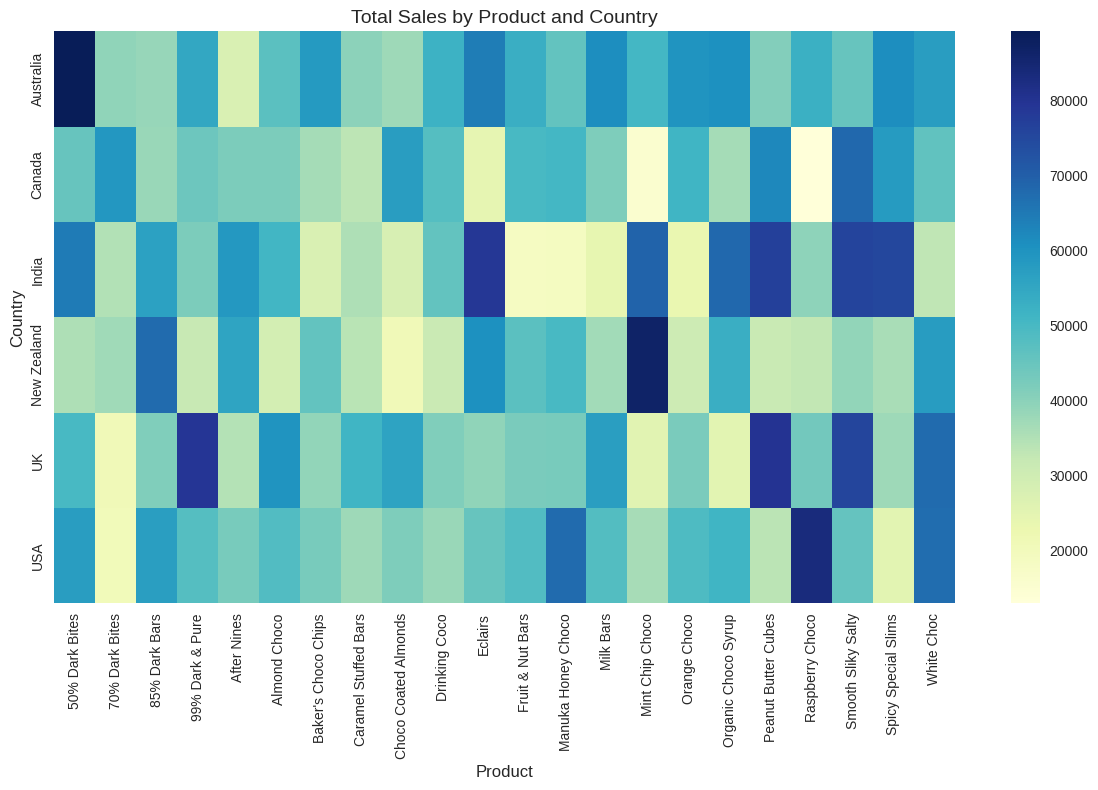

<Figure size 1200x600 with 0 Axes>

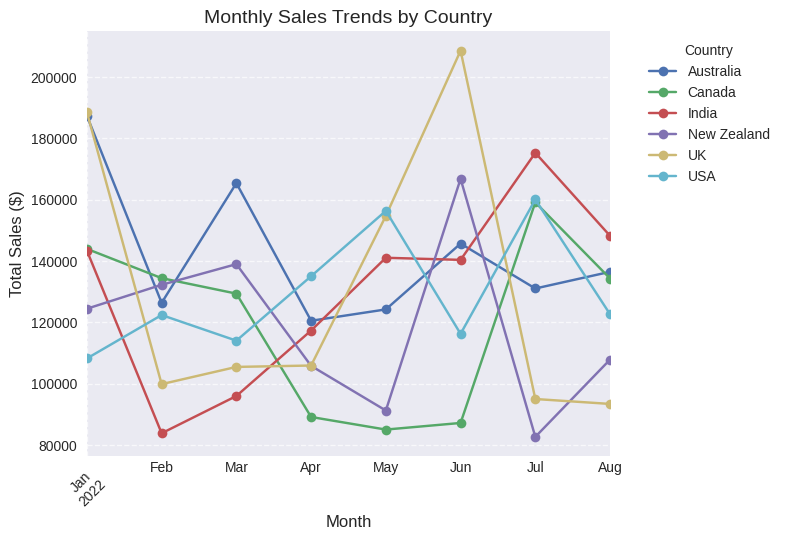

<Figure size 1200x600 with 0 Axes>

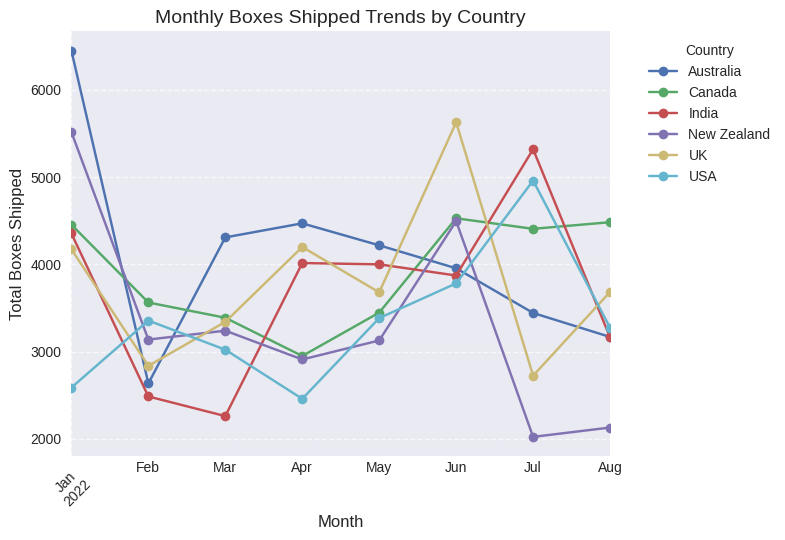

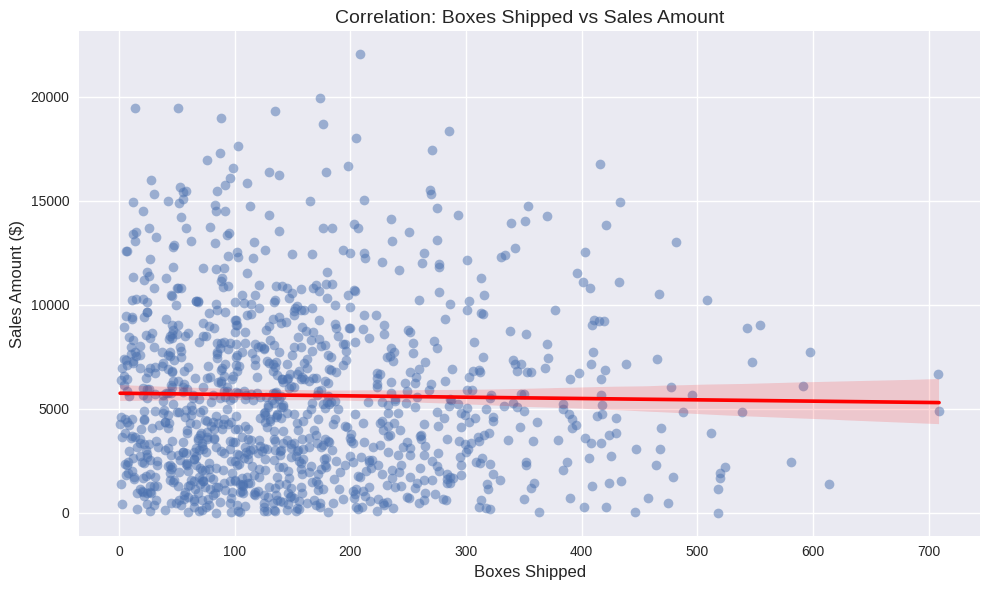

Correlation between Boxes Shipped and Sales Amount: -0.02


In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Kaggle file path
file_path = '/kaggle/input/chocolate-sales/Chocolate Sales.csv'
df = pd.read_csv(file_path)

# Clean the 'Amount' column (remove '$' and commas, convert to float)
df['Amount'] = df['Amount'].replace({'\$': '', ',': '', ' ': ''}, regex=True).astype(float)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Set plotting style
plt.style.use('seaborn')

# 1. Purchase Frequency by Country (Bar Plot)
plt.figure(figsize=(10, 6))
purchase_freq = df['Country'].value_counts()
purchase_freq.plot(kind='bar', color='skyblue')
plt.title('Purchase Frequency by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Average Order Value (AOV) by Country (Bar Plot)
plt.figure(figsize=(10, 6))
aov_by_country = df.groupby('Country')['Amount'].mean().sort_values(ascending=False)
aov_by_country.plot(kind='bar', color='lightgreen')
plt.title('Average Order Value (AOV) by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Sales Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Top Products by Country (Heatmap)
plt.figure(figsize=(12, 8))
top_products = pd.pivot_table(df, values='Amount', index='Country', columns='Product', aggfunc='sum', fill_value=0)
sns.heatmap(top_products, cmap='YlGnBu', annot=False, fmt='.0f')
plt.title('Total Sales by Product and Country', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

# 4. Sales and Volume Trends Over Time by Country (Line Plot)
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby([df['Date'].dt.to_period('M'), 'Country'])['Amount'].sum().unstack()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends by Country', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Volume (Boxes Shipped) Trends
plt.figure(figsize=(12, 6))
monthly_boxes = df.groupby([df['Date'].dt.to_period('M'), 'Country'])['Boxes Shipped'].sum().unstack()
monthly_boxes.plot(kind='line', marker='o')
plt.title('Monthly Boxes Shipped Trends by Country', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Boxes Shipped', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Correlation Analysis: Boxes Shipped vs Sales Amount (Scatter Plot with Regression)
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Boxes Shipped', y='Amount', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation: Boxes Shipped vs Sales Amount', fontsize=14)
plt.xlabel('Boxes Shipped', fontsize=12)
plt.ylabel('Sales Amount ($)', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate and print correlation coefficient
correlation = df['Boxes Shipped'].corr(df['Amount'])
print(f"Correlation between Boxes Shipped and Sales Amount: {correlation:.2f}")

<ipython-input-8-cae850355504>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 1200x600 with 0 Axes>

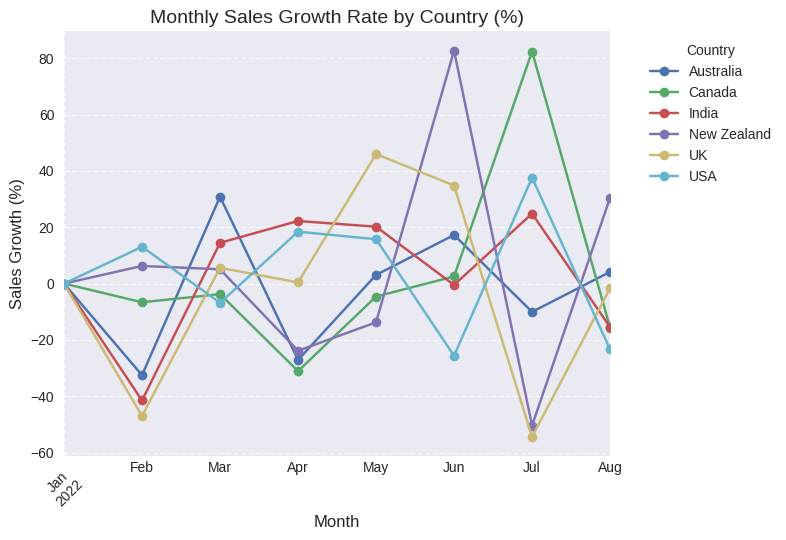

<Figure size 1200x600 with 0 Axes>

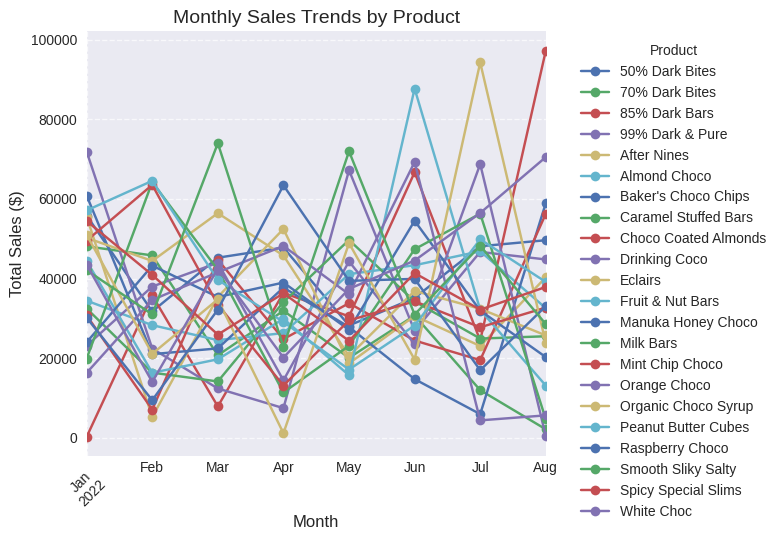

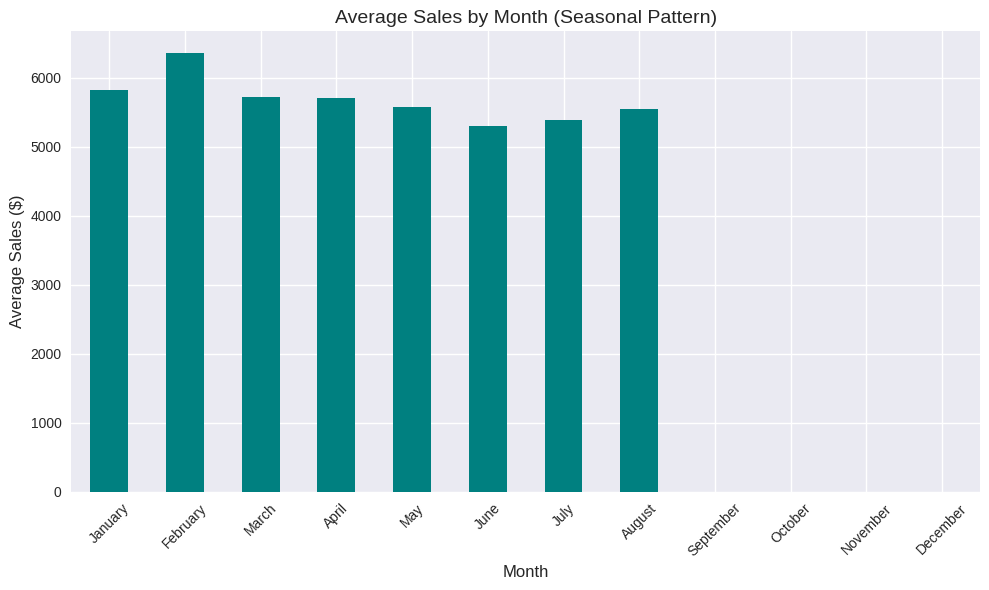

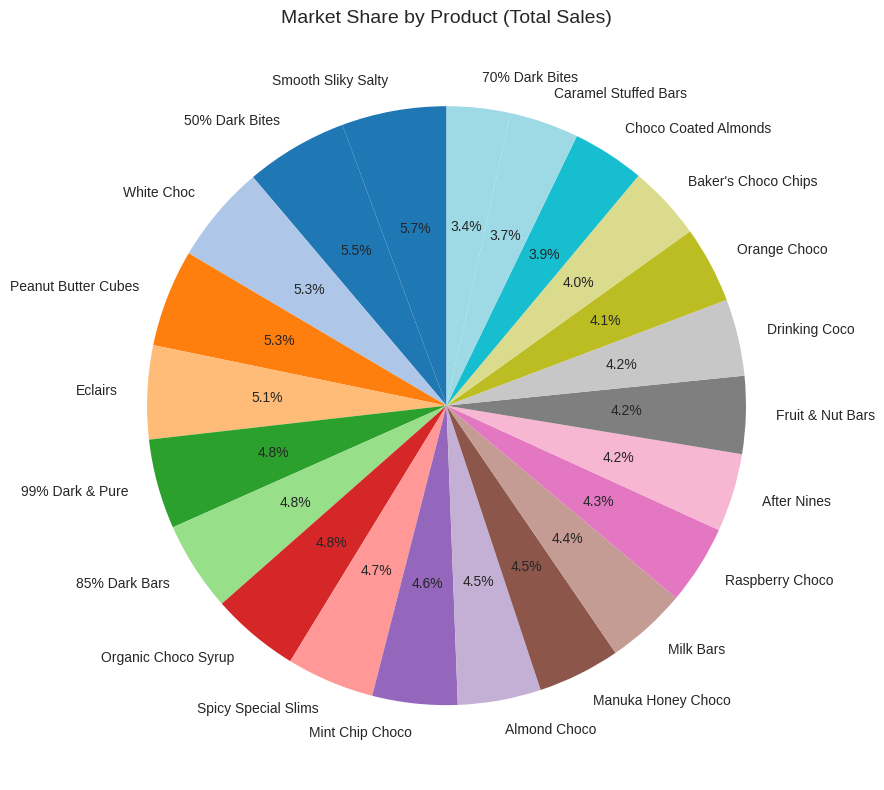

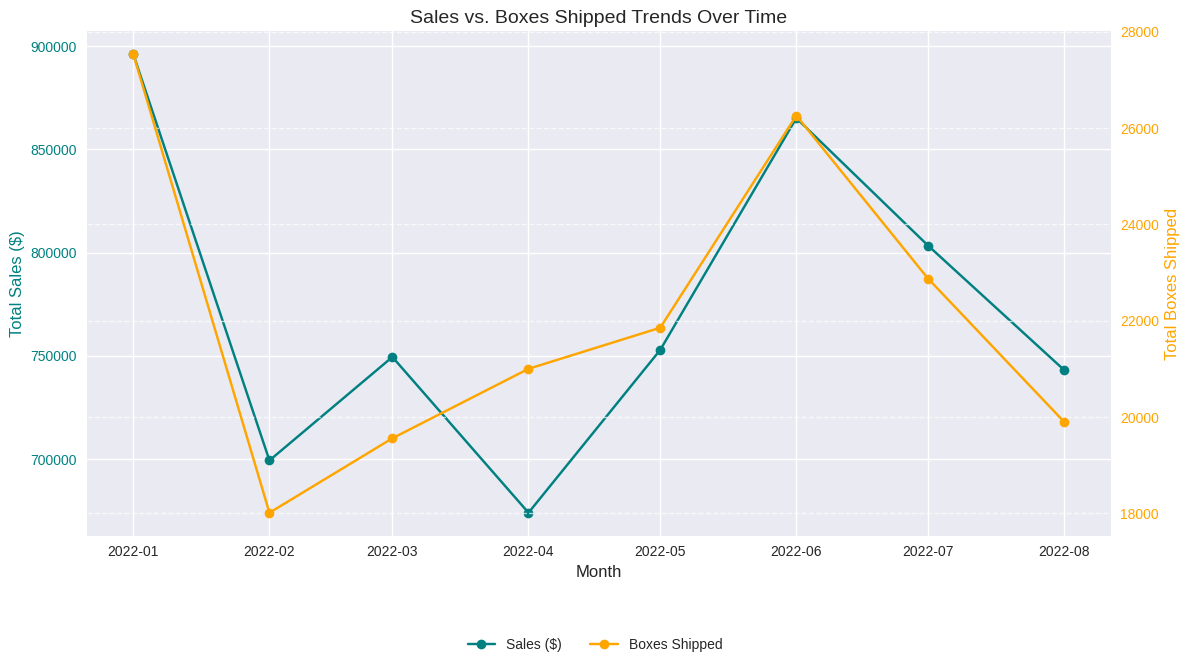


Market Trend Insights:
Top Growing Country (Avg Growth): New Zealand (4.57%)
Top Product by Sales: Smooth Sliky Salty ($349,692.00)
Peak Sales Month: February (Avg $6,357.97)


In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Kaggle file path
file_path = '/kaggle/input/chocolate-sales/Chocolate Sales.csv'
df = pd.read_csv(file_path)

# Clean the 'Amount' column (remove '$' and commas, convert to float)
df['Amount'] = df['Amount'].replace({'\$': '', ',': '', ' ': ''}, regex=True).astype(float)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Set plotting style
plt.style.use('seaborn')

# 1. Sales Growth by Country (Percentage Change Over Time)
plt.figure(figsize=(12, 6))
monthly_sales_country = df.groupby([df['Date'].dt.to_period('M'), 'Country'])['Amount'].sum().unstack()
growth_country = monthly_sales_country.pct_change().fillna(0) * 100  # Percentage change
growth_country.plot(kind='line', marker='o')
plt.title('Monthly Sales Growth Rate by Country (%)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Growth (%)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Product Sales Trends Over Time (Line Plot)
plt.figure(figsize=(12, 6))
monthly_sales_product = df.groupby([df['Date'].dt.to_period('M'), 'Product'])['Amount'].sum().unstack()
monthly_sales_product.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends by Product', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Seasonal Patterns (Monthly Average Sales)
plt.figure(figsize=(10, 6))
df['Month'] = df['Date'].dt.month_name()
seasonal_sales = df.groupby('Month')['Amount'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])
seasonal_sales.plot(kind='bar', color='teal')
plt.title('Average Sales by Month (Seasonal Pattern)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Market Share by Product (Pie Chart)
plt.figure(figsize=(10, 8))
product_share = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)
product_share.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title('Market Share by Product (Total Sales)', fontsize=14)
plt.ylabel('')  # Remove y-label for cleaner pie chart
plt.tight_layout()
plt.show()

# 5. Volume vs. Revenue Trends (Dual-Axis Plot)
fig, ax1 = plt.subplots(figsize=(12, 6))
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()
monthly_boxes = df.groupby(df['Date'].dt.to_period('M'))['Boxes Shipped'].sum()

ax1.plot(monthly_sales.index.to_timestamp(), monthly_sales, color='teal', label='Sales ($)', marker='o')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Total Sales ($)', color='teal', fontsize=12)
ax1.tick_params(axis='y', labelcolor='teal')

ax2 = ax1.twinx()
ax2.plot(monthly_boxes.index.to_timestamp(), monthly_boxes, color='orange', label='Boxes Shipped', marker='o')
ax2.set_ylabel('Total Boxes Shipped', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Sales vs. Boxes Shipped Trends Over Time', fontsize=14)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary insights
print("\nMarket Trend Insights:")
print(f"Top Growing Country (Avg Growth): {growth_country.mean().idxmax()} ({growth_country.mean().max():.2f}%)")
print(f"Top Product by Sales: {product_share.idxmax()} (${product_share.max():,.2f})")
print(f"Peak Sales Month: {seasonal_sales.idxmax()} (Avg ${seasonal_sales.max():,.2f})")

<ipython-input-9-ce76de22d4f1>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


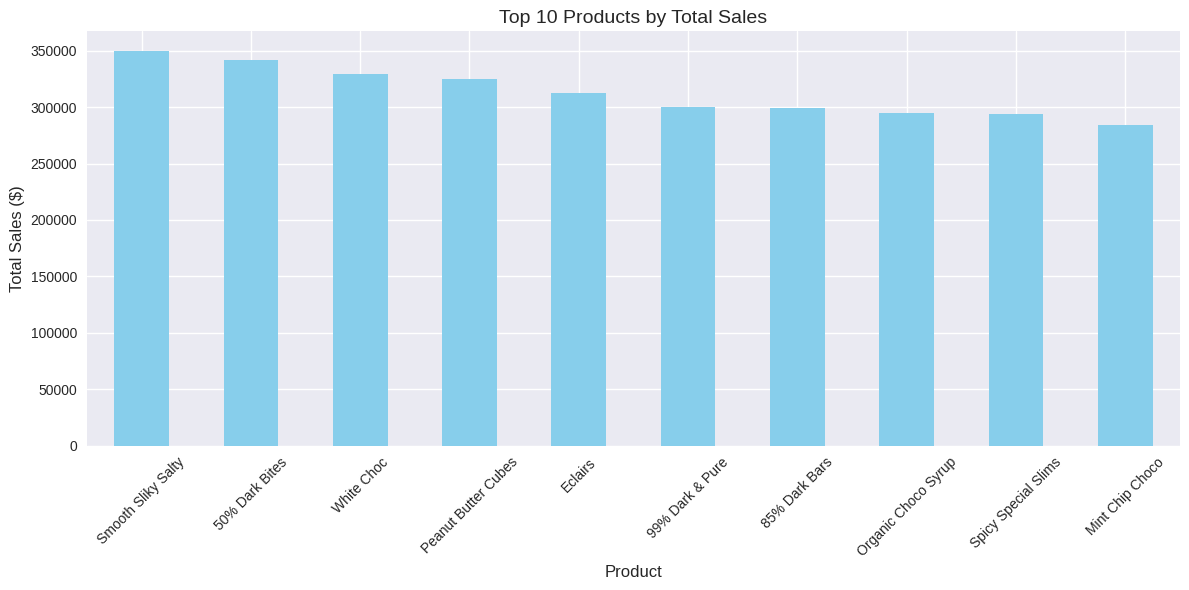

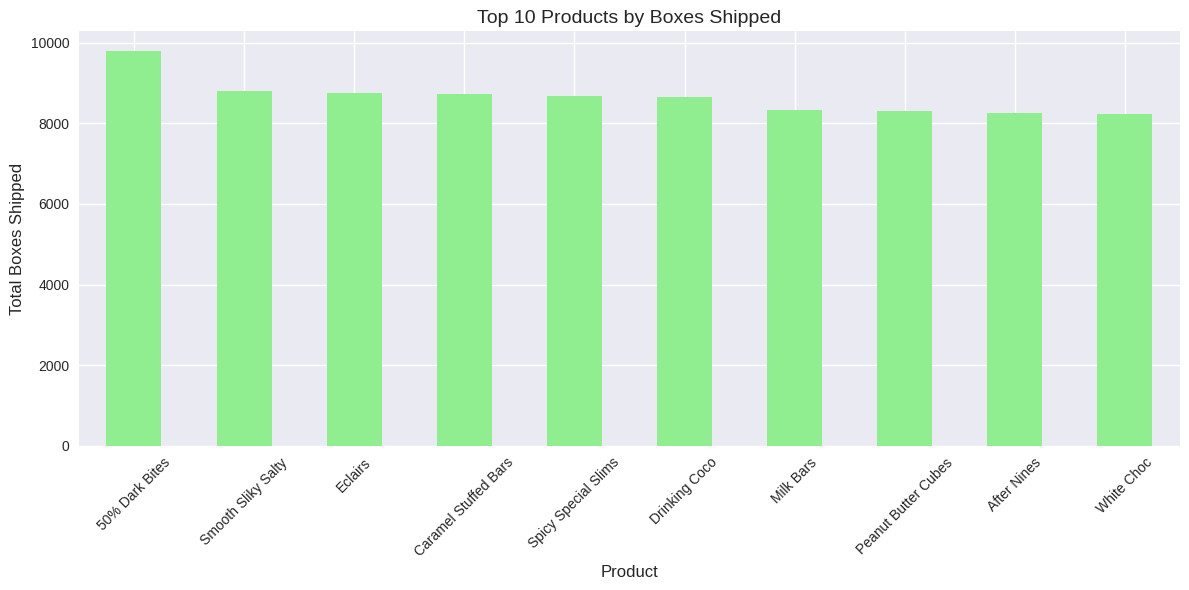

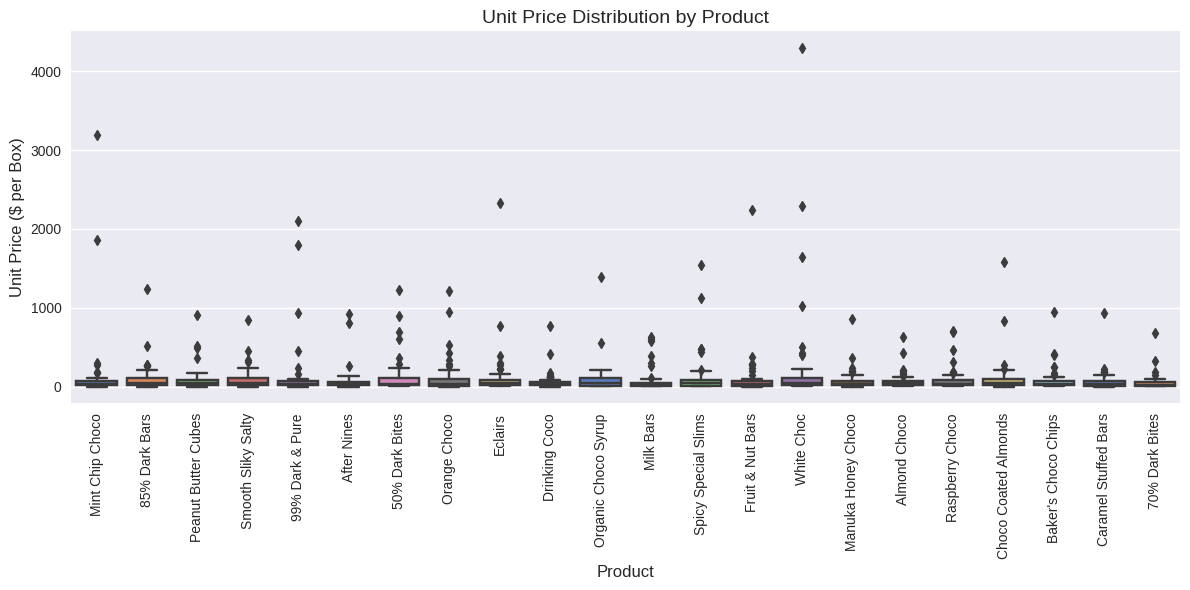

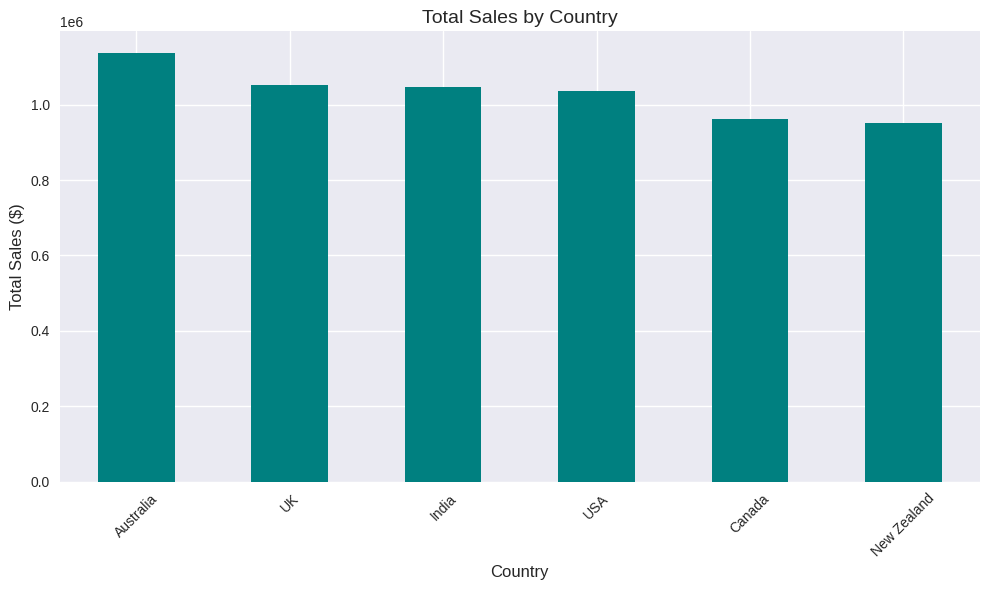

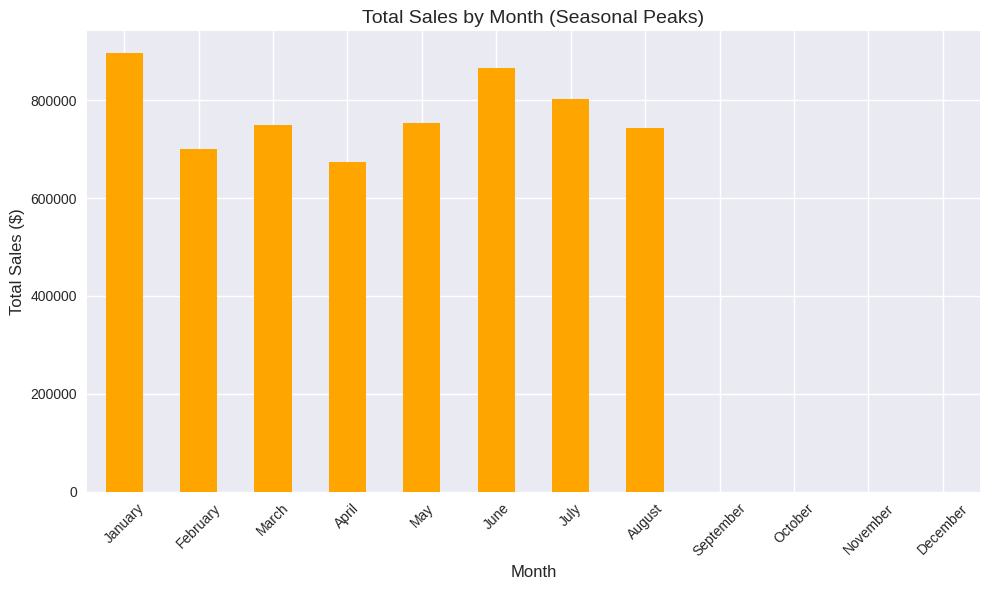


Inventory Optimization Insights:
                       Amount  Boxes Shipped  Unit Price
Product                                                 
Smooth Sliky Salty   349692.0           8810   88.729109
50% Dark Bites       341712.0           9792  111.746304
White Choc           329147.0           8240  232.048425
Peanut Butter Cubes  324842.0           8304   92.304101
Eclairs              312445.0           8757  117.648077

Pricing Strategy Insights:
Average Unit Price Across Products: $105.72

Marketing Strategy Insights:
Top Country by Sales: Australia ($1,137,367.00)
Peak Sales Month: January ($896,105.00)


In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Kaggle file path
file_path = '/kaggle/input/chocolate-sales/Chocolate Sales.csv'
df = pd.read_csv(file_path)

# Clean the 'Amount' column (remove '$' and commas, convert to float)
df['Amount'] = df['Amount'].replace({'\$': '', ',': '', ' ': ''}, regex=True).astype(float)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Calculate unit price (Amount / Boxes Shipped)
df['Unit Price'] = df['Amount'] / df['Boxes Shipped']

# Set plotting style
plt.style.use('seaborn')

# 1. Inventory Optimization: Top Products by Sales and Boxes Shipped
plt.figure(figsize=(12, 6))
top_products_sales = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)
top_products_sales.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Total Sales', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
top_products_boxes = df.groupby('Product')['Boxes Shipped'].sum().sort_values(ascending=False).head(10)
top_products_boxes.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Products by Boxes Shipped', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Boxes Shipped', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Pricing Strategy: Unit Price Distribution by Product
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Unit Price', data=df, palette='muted')
plt.title('Unit Price Distribution by Product', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Unit Price ($ per Box)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. Marketing Strategy: Sales by Country and Seasonal Peaks
plt.figure(figsize=(10, 6))
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
country_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
df['Month'] = df['Date'].dt.month_name()
seasonal_sales = df.groupby('Month')['Amount'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])
seasonal_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Month (Seasonal Peaks)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate key metrics for decision-making
inventory_metrics = df.groupby('Product').agg({'Amount': 'sum', 'Boxes Shipped': 'sum', 'Unit Price': 'mean'})
country_metrics = df.groupby('Country').agg({'Amount': 'sum', 'Boxes Shipped': 'sum'})
seasonal_metrics = df.groupby('Month')['Amount'].sum()

# Print insights
print("\nInventory Optimization Insights:")
print(inventory_metrics.sort_values('Amount', ascending=False).head(5))
print("\nPricing Strategy Insights:")
print(f"Average Unit Price Across Products: ${df['Unit Price'].mean():.2f}")
print("\nMarketing Strategy Insights:")
print(f"Top Country by Sales: {country_sales.idxmax()} (${country_sales.max():,.2f})")
print(f"Peak Sales Month: {seasonal_metrics.idxmax()} (${seasonal_metrics.max():,.2f})")